In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df=pd.read_csv(r"EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [2]:
df.isnull().sum()


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [3]:
### 1. Handling Missing Values ###

#option1 Drop rows with missing values
df_cleaned = df.dropna()
df_cleaned


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# Option 2: Fill missing values with mean/median/mode
#df['column_name'] = df['column_name'].fillna(df['column_name'].mean())  # or median(), mode()[0]

In [5]:
### 2. Removing Outliers by using IQR (Interquartile Range)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_outliers_removed = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [6]:
IQR

ID#                   2010.0
Balance              73876.5
Qual_miles               0.0
cc1_miles                2.0
cc2_miles                0.0
cc3_miles                0.0
Bonus_miles          22550.5
Bonus_trans             14.0
Flight_miles_12mo      311.0
Flight_trans_12          1.0
Days_since_enroll     3460.5
Award?                   1.0
dtype: float64

In [7]:
df_outliers_removed

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
### Scaling Features ###

# Option 1: Standardization (Z-score normalization)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_outliers_removed), columns=df_outliers_removed.columns)

# Option 2: Min-Max Scaling (Normalization to [0, 1] range)
min_max_scaler = MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_outliers_removed), columns=df_outliers_removed.columns)


In [9]:
#final preprocessed dataset
print(df_scaled.head())

        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0  0.000000  0.138672         0.0        0.0        0.0        0.0   
1  0.000249  0.094745         0.0        0.0        0.0        0.0   
2  0.000498  0.203884         0.0        0.0        0.0        0.0   
3  0.000746  0.072690         0.0        0.0        0.0        0.0   
4  0.001244  0.080805         0.0        0.0        0.0        0.0   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0     0.003032     0.026316                0.0              0.0   
1     0.003747     0.052632                0.0              0.0   
2     0.071852     0.105263                0.0              0.0   
3     0.008714     0.026316                0.0              0.0   
4     0.000000     0.000000                0.0              0.0   

   Days_since_enroll  Award?  
0           0.843629     0.0  
1           0.839768     0.0  
2           0.847732     0.0  
3           0.837838     0.0  
4           0.836631 

In [10]:
#1.2 EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [11]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [12]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [13]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

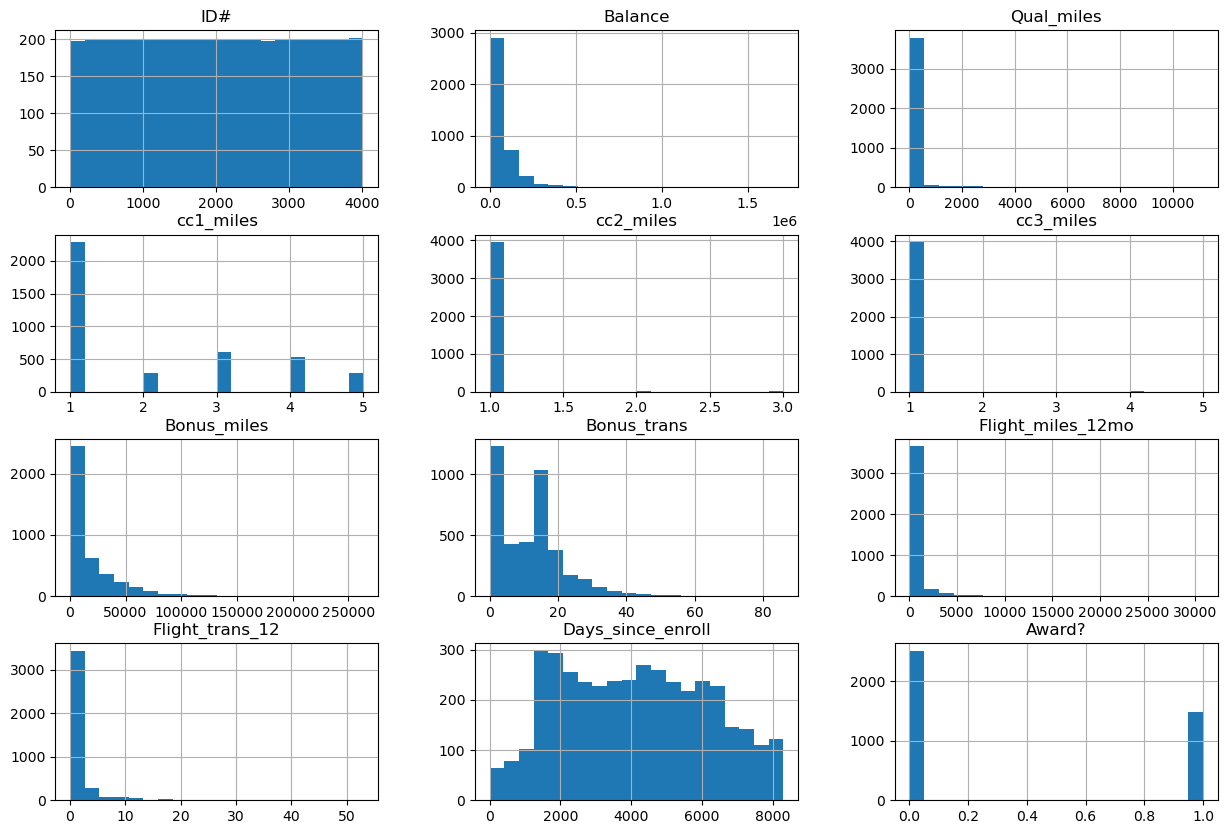

In [14]:
#distribution of data
# Histogram for distribution of each feature
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(15, 10))
plt.show()



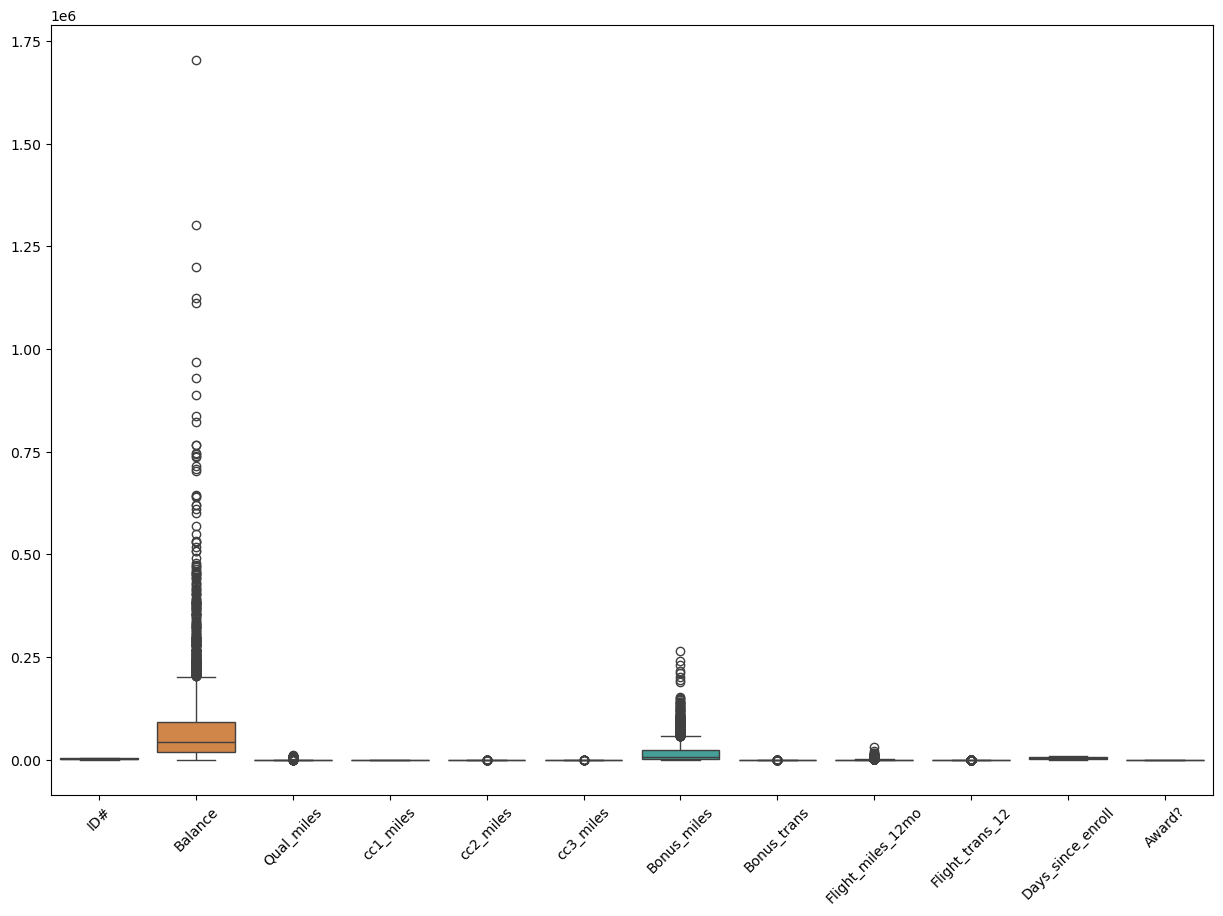

In [15]:
# Boxplots for visualizing outliers and distributions
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()



In [16]:
# Correlation matrix
corr_matrix = df.corr()
corr_matrix

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


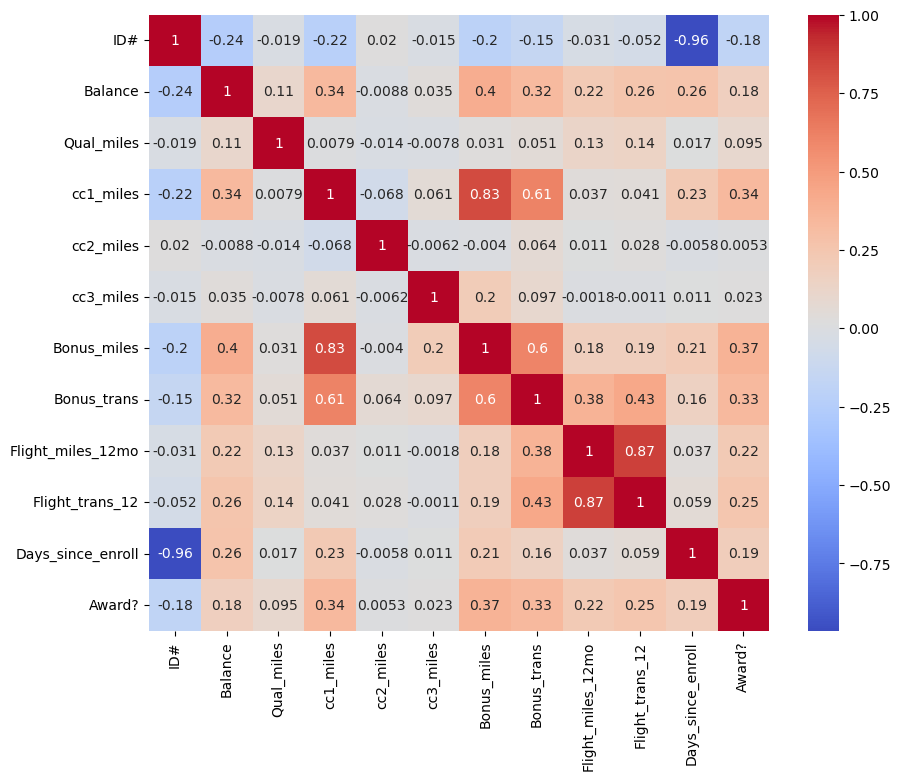

In [17]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Scatterplot to explore relationships between specific features
sns.pairplot(df)
plt.show()


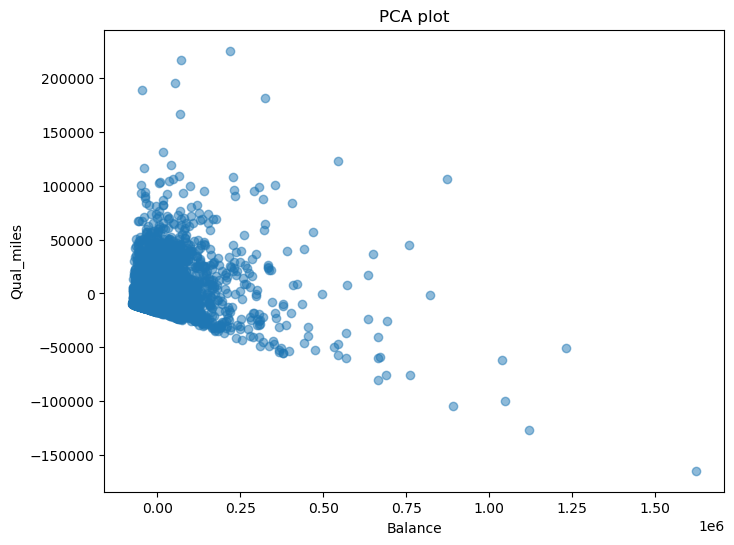

In [19]:
###  Clustering Insight (PCA and KMeans) ###

# Using Principal Component Analysis (PCA) for dimensionality reduction to visualize data in 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df.dropna()), columns=['Balance', 'Qual_miles'])

# Scatterplot of the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['Balance'], df_pca['Qual_miles'], alpha=0.5)
plt.title('PCA plot')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()



In [ ]:
#new code...

In [22]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Check the first few rows of scaled data
pd.DataFrame(df_scaled, columns=df.select_dtypes(include=['float64', 'int64']).columns).head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


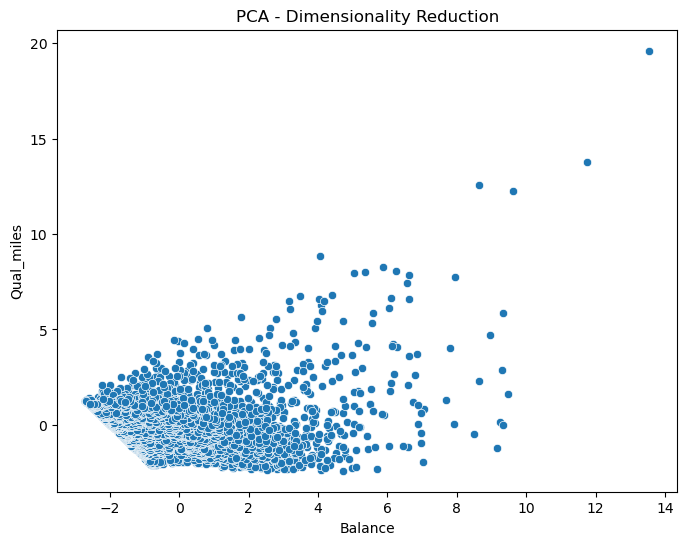

In [24]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=['Balance', 'Qual_miles'])

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Balance', y='Qual_miles', data=pca_df)
plt.title('PCA - Dimensionality Reduction')
plt.show()

C:\Users\nazme\AppData\Local\Temp\ipykernel_1980\1536865352.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Balance', y='Qual_miles', data=pca_df, palette='Set1')


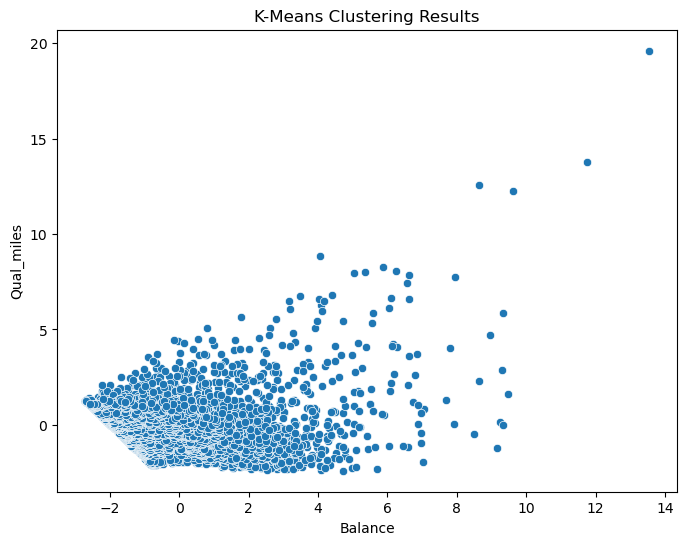

In [26]:
df_cleaned = df.dropna()  # Clean the original df by removing rows with missing values
df_scaled = scaler.fit_transform(df_cleaned.select_dtypes(include=['float64', 'int64']))

# Fit KMeans using the cleaned data
# Apply KMeans to find clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
kmeans.fit(df_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Plot clusters using PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Balance', y='Qual_miles', data=pca_df, palette='Set1')
plt.title('K-Means Clustering Results')
plt.show()

In [28]:
# Group by cluster and analyze statistics of each cluster
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
0        1081.504965   58744.261702   85.485106   1.548227   1.017021   
1        1536.189886  150273.783282  297.058824   3.830753   1.007224   
2        3113.440123   40670.990123  103.660494   1.445062   1.016667   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
0         1.000709   7552.780142     8.696454         212.626950   
1         1.046440  48214.167183    21.628483        1200.460268   
2         1.001852   6909.439506     8.133333         232.538889   

         Flight_trans_12  Days_since_enroll    Award?  
Cluster                                                
0               0.646809        5739.160993  0.275887  
1               3.594427        4982.453044  0.750258  
2               0.677778        2191.299383  0.225309  


In [36]:
#2.Implementing clustering algorithms

!pip install scikit-learn matplotlib numpy pandas scipy



In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#to handle the missing values
data_scaled=scaler.fit_transform(df)

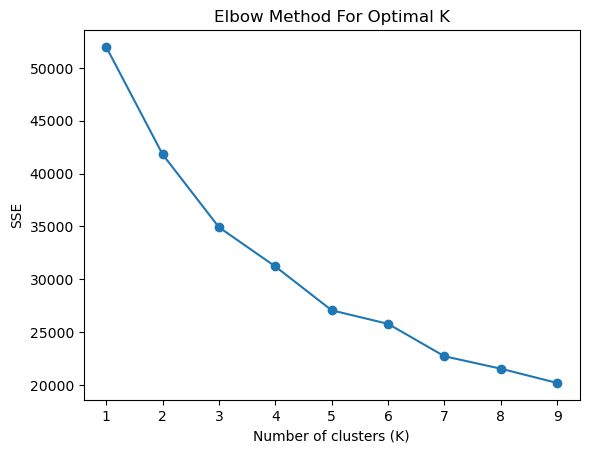

In [48]:
#Elbow method to determine optimal number of clusters(K)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method for finding optimal K
sse = []  #SSE-sum of square errors
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE for Elbow Method
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal K')
plt.show()

In [64]:
# Apply K-Means with optimal K
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)

# Adding cluster labels to the dataset
df['KMeans_Cluster'] = clusters_kmeans
df['KMeans_Cluster']

0       0
1       0
2       0
3       0
4       2
       ..
3994    1
3995    1
3996    1
3997    1
3998    1
Name: KMeans_Cluster, Length: 3999, dtype: int32

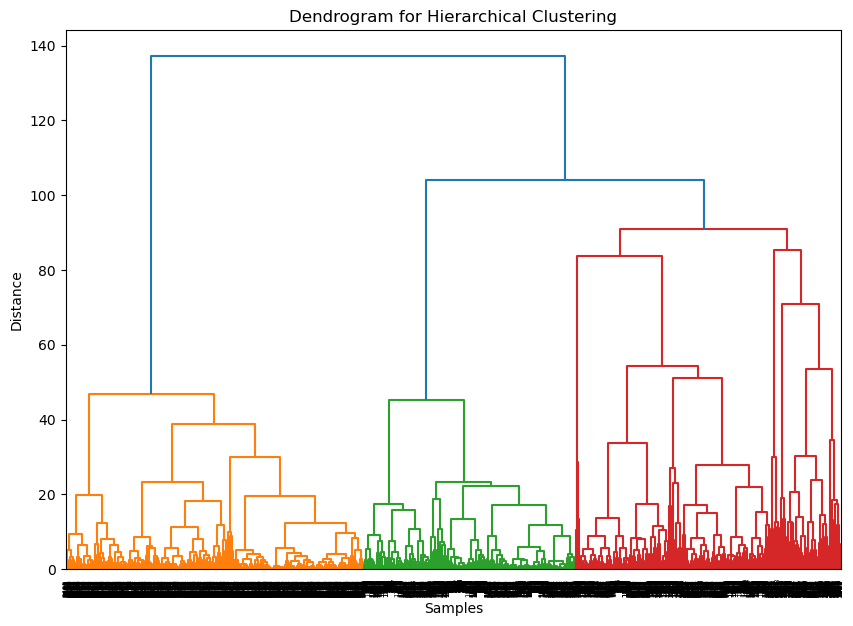

In [56]:
#implementing Hierarchical clustering 

from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
linked = linkage(data_scaled, method='ward')  # You can experiment with 'ward', 'complete', 'average'

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [58]:
#apply agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_hierarchical = hierarchical.fit_predict(data_scaled)

# Adding cluster labels to the dataset
df['Hierarchical_Cluster'] = clusters_hierarchical

In [62]:
#implement DBSCAN 
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Experiment with different values of eps and min_samples
clusters_dbscan = dbscan.fit_predict(data_scaled)

# Adding cluster labels to the dataset
df['DBSCAN_Cluster'] = clusters_dbscan
df['DBSCAN_Cluster']

0        0
1        0
2        0
3        0
4       -1
        ..
3994    22
3995    -1
3996    -1
3997    21
3998    21
Name: DBSCAN_Cluster, Length: 3999, dtype: int64

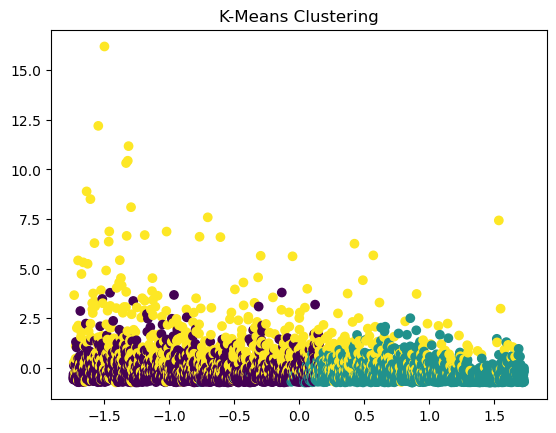

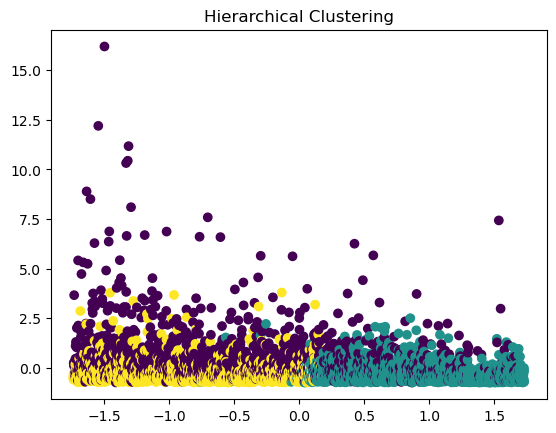

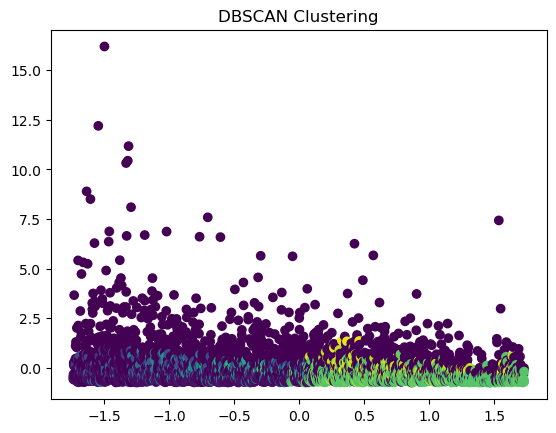

In [66]:
#Visualization(Evaluate the clustering results)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_kmeans, cmap='viridis', label='KMeans')
plt.title('K-Means Clustering')
plt.show()

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_hierarchical, cmap='viridis', label='Hierarchical')
plt.title('Hierarchical Clustering')
plt.show()

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_dbscan, cmap='viridis', label='DBSCAN')
plt.title('DBSCAN Clustering')
plt.show()

In [68]:
#Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate KMeans
silhouette_kmeans = silhouette_score(data_scaled, clusters_kmeans)
db_index_kmeans = davies_bouldin_score(data_scaled, clusters_kmeans)

# Evaluate Hierarchical
silhouette_hierarchical = silhouette_score(data_scaled, clusters_hierarchical)
db_index_hierarchical = davies_bouldin_score(data_scaled, clusters_hierarchical)

# Evaluate DBSCAN
# Note: DBSCAN assigns -1 to noise points, so you may need to filter them out for evaluation
valid_clusters_dbscan = clusters_dbscan[clusters_dbscan != -1]  # Remove noise
data_valid_dbscan = data_scaled[clusters_dbscan != -1]  # Corresponding valid data points

if len(valid_clusters_dbscan) > 1:
    silhouette_dbscan = silhouette_score(data_valid_dbscan, valid_clusters_dbscan)
    db_index_dbscan = davies_bouldin_score(data_valid_dbscan, valid_clusters_dbscan)
else:
    silhouette_dbscan, db_index_dbscan = None, None

print(f"KMeans Silhouette: {silhouette_kmeans}, DB Index: {db_index_kmeans}")
print(f"Hierarchical Silhouette: {silhouette_hierarchical}, DB Index: {db_index_hierarchical}")
print(f"DBSCAN Silhouette: {silhouette_dbscan}, DB Index: {db_index_dbscan}")

KMeans Silhouette: 0.30762518658941423, DB Index: 1.4833267682254736
Hierarchical Silhouette: 0.25128962757565176, DB Index: 1.682021987745874
DBSCAN Silhouette: 0.15850588541023644, DB Index: 1.0662021203498908
